In [2]:
#load the built in dataset
from tensorflow.keras.datasets import mnist
#load the train and test dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#check if we using gpu or not
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())#if not just select it from edit>>hardware accelarator>>select :)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9109256320071849285
xla_global_id: -1
]


In [4]:
#check the shape with dimension of train data set
print("size and dimension of train dataset: "+str(x_train.shape))
#check the no. of samples data
print("size of trainning dataset: "+str(len(x_train))) #another way print(x_train.shape[0])
#check the dimension of the training data set
print("dimesion of the trainning dataset: "+str(x_train[0].shape))#another way to get dimension len(x_train[0])
#check the no of lables
print("no of labels in trainning dataset: "+str(len(y_train)))
#hey how do we know it's a label ... just check the dimension, labels don have any
print("dimesion of the trainning dataset: "+str(y_train[0].shape))

#now check the same thing for test dataset
print("\n")
#check the shape with dimension of test data set
print("size and dimension of test dataset: "+str(x_test.shape))
#check the no. of samples data
print("size of test dataset: "+str(len(x_test)))
#check the dimension of the training data set
print("dimesion of the test dataset: "+str(x_test[0].shape))
#check the no of lables
print("no of labels in test dataset: "+str(len(y_test)))

size and dimension of train dataset: (60000, 28, 28)
size of trainning dataset: 60000
dimesion of the trainning dataset: (28, 28)
no of labels in trainning dataset: 60000
dimesion of the trainning dataset: ()


size and dimension of test dataset: (10000, 28, 28)
size of test dataset: 10000
dimesion of the test dataset: (28, 28)
no of labels in test dataset: 10000


In [5]:
#want to visualize the images ?? no worries!!
import cv2
import numpy as np
import matplotlib.pyplot as plt

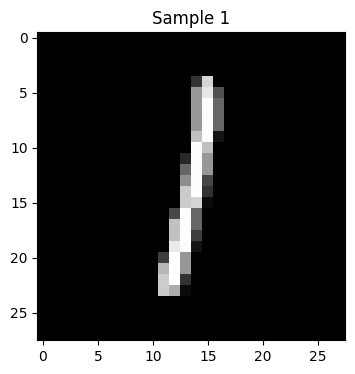

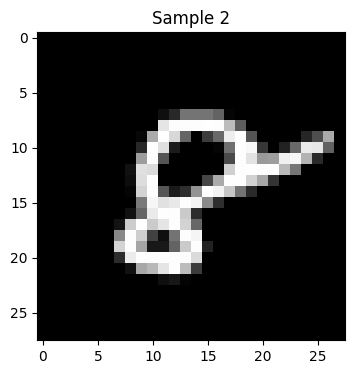

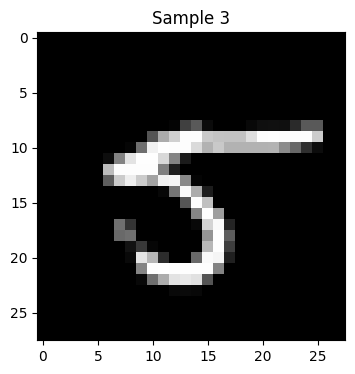

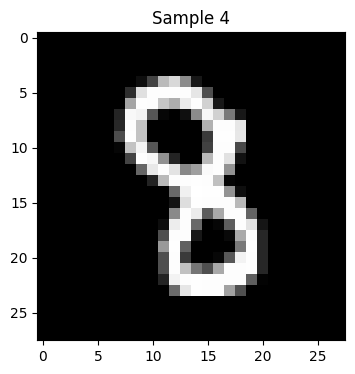

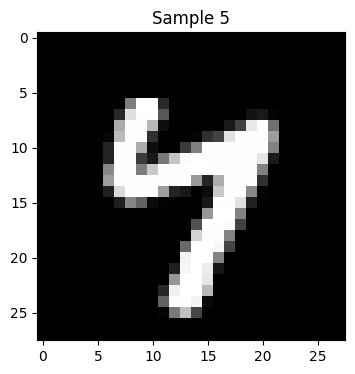

In [6]:
#define the imgshow function
def imgshow(title = "", image = None , size = 4):
  if image.any():
    w,h = image.shape[0],image.shape[1] # or you can write w,h = image.shape,works same
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(image,cmap='gray') #check what gray_r do instead of gray,,fun!!
    plt.title(title)
    plt.axis('on')
    plt.show()
  else:
    print(" no image ")

#show random 5 images
#want a specific random combination just write:- np.random.seed(any number) before the loop
for i in range(0,5):
  random_num = np.random.randint(len(x_train))
  img = x_train[random_num]
  imgshow(title=f"Sample {i+1}", image=img)

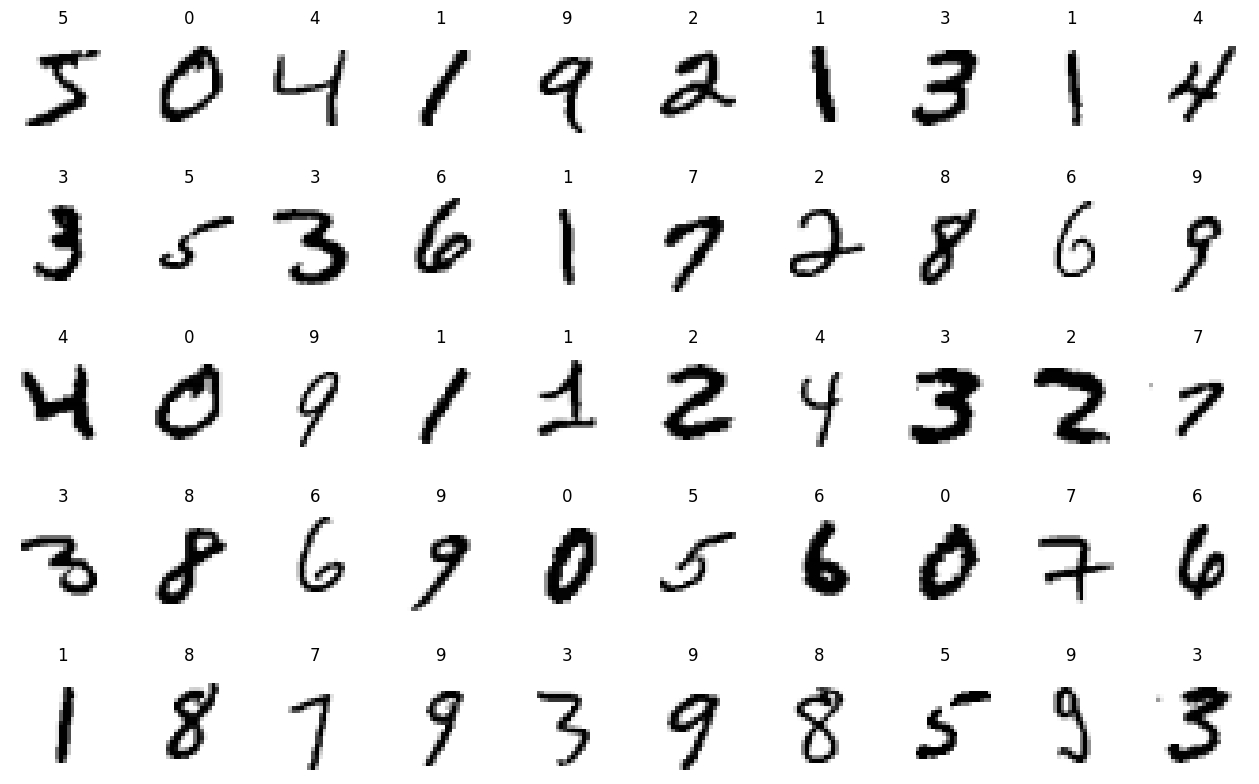

In [7]:
#wanna see bunch of images with labels??
num_of_images = 50 # define the no of images you want to see
plt.figure(figsize=(16,10))

for i in range(num_of_images):
    plt.subplot(5, 10, i + 1).set_title(f'{y_train[i]}')  # Use i here
    plt.axis("off")
    plt.imshow(x_train[i], cmap='gray_r')


In [8]:
#now let preprocess the data
#so keras want to see data in 4 dimension format ... lets do it
#so to perform normalization and preprocessing you need to change uint8  to float32
#next normalize them between 0 and 1 or -1 to 1
#then implement one hot encoding on labeled data

#firstly lets store the no of rows and columns
img_rows = x_train[0].shape[1]
img_columns = x_train[0].shape[1]
#now reshape the train and test data
x_train = x_train.reshape(x_train.shape[0],img_rows,img_columns,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_columns,1)
#keep a track of image shape
input_shape = (img_rows,img_columns,1)
#change the image type to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize the data
x_train /= 255
x_test /= 255
#print the shape of train and test images
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
from tensorflow.keras.utils import to_categorical
#now one hot encode the outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#lets count the number of columns in the matrix
print("number of classes: "+str(y_test.shape[1]))
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

number of classes: 10


In [10]:
#now lets look at a random image data
y_train[25]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
#building the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Helps prevent overfitting
model.add(Dense(num_classes, activation='softmax'))  # Output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#overfitting prevention
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#trainning the model
history = model.fit(x_train, y_train,
                    batch_size=128,
              epochs=10,
              verbose=1,
              validation_split=0.1,
              callbacks=[early_stop])


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 104ms/step - accuracy: 0.7964 - loss: 0.6455 - val_accuracy: 0.9820 - val_loss: 0.0632
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.9653 - loss: 0.1163 - val_accuracy: 0.9860 - val_loss: 0.0476
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9750 - loss: 0.0809 - val_accuracy: 0.9893 - val_loss: 0.0390
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9797 - loss: 0.0657 - val_accuracy: 0.9912 - val_loss: 0.0355
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9834 - loss: 0.0548 - val_accuracy: 0.9903 - val_loss: 0.0365
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9858 - loss: 0.0444 - val_accuracy: 0.9917 - val_loss: 0.0304
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9920 - val_loss: 0.0298
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9889 - loss: 0.0356 -

In [32]:
#loss and accuracy chart

history_dict = history.history
history_dict

{'accuracy': [0.9038518667221069,
  0.9674814939498901,
  0.9762963056564331,
  0.980555534362793,
  0.9842407703399658,
  0.9855740666389465,
  0.9874629378318787,
  0.9886296391487122,
  0.9903518557548523,
  0.9910370111465454],
 'loss': [0.3143607974052429,
  0.10778968036174774,
  0.07812841981649399,
  0.06492044776678085,
  0.05367451161146164,
  0.04513130336999893,
  0.040711481124162674,
  0.03677375242114067,
  0.032629579305648804,
  0.027621880173683167],
 'val_accuracy': [0.9819999933242798,
  0.9860000014305115,
  0.9893333315849304,
  0.9911666512489319,
  0.9903333187103271,
  0.9916666746139526,
  0.9919999837875366,
  0.9918333292007446,
  0.9915000200271606,
  0.9919999837875366],
 'val_loss': [0.06319514662027359,
  0.047645095735788345,
  0.039001043885946274,
  0.03549462929368019,
  0.036453764885663986,
  0.030387016013264656,
  0.029757583513855934,
  0.03375322371721268,
  0.03136078268289566,
  0.03266214206814766]}

In [36]:
#save the model
import tensorflow as tf
model.save('Mnist_usingtenSorFlow.h5')
print("model saved")

model saved


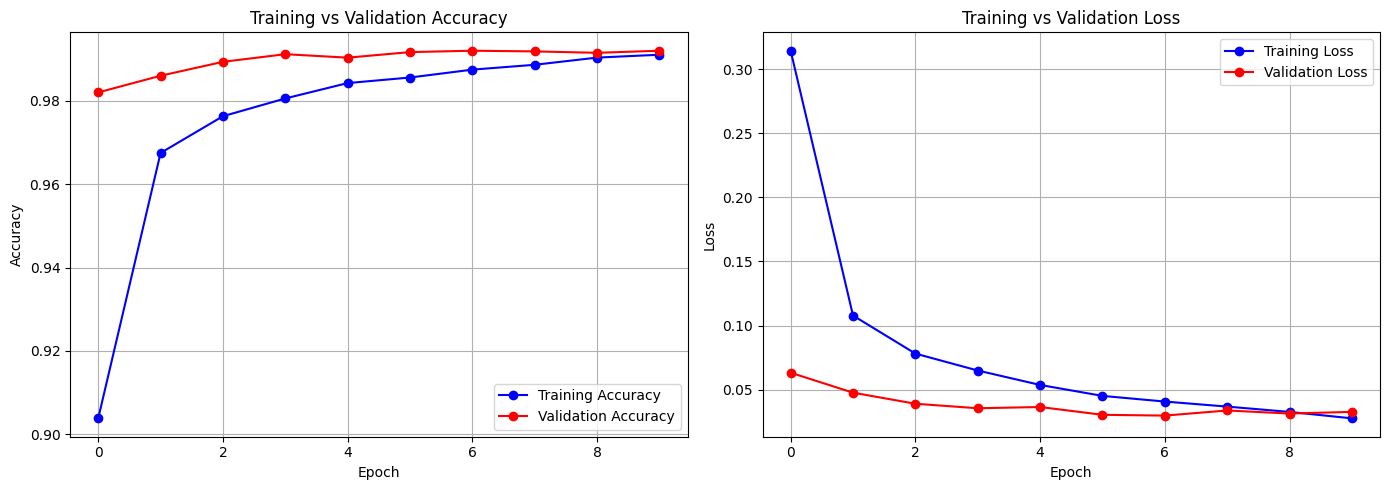

In [14]:
#plot the training data
#Blue line: Training performance
#Red line: Validation performance
#If the red line starts to diverge from the blue,, overfitting!
#If they both struggle to rise/fall, the model might need more power or data.
import matplotlib.pyplot as plt

# Unpack training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
#test the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9894 - loss: 0.0358
 Test Accuracy: 99.16%
Test Loss: 0.0289


Saving b508465fac4f54a40cfdbb2b69707f5a_t.jpeg to b508465fac4f54a40cfdbb2b69707f5a_t (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


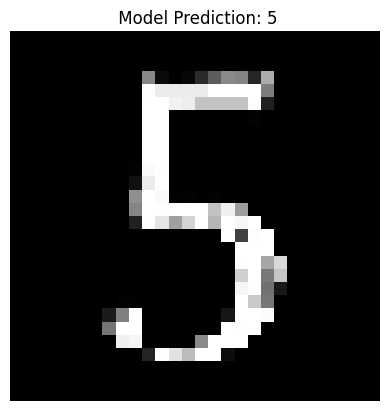

Confidence scores for each digit (0-9):
0: 0.0000
1: 0.0000
2: 0.0000
3: 0.0000
4: 0.0000
5: 1.0000
6: 0.0000
7: 0.0000
8: 0.0000
9: 0.0000


In [27]:
#no fun without a visual prediction ,, so let's do it
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Upload the image from local machine
uploaded = files.upload()

# Get filename
filename = list(uploaded.keys())[0]

# Step 2: Read image in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Check if loaded
if img is None:
    raise ValueError(" Could not read image. Make sure it's uploaded and in a supported format (PNG, JPG).")

# Step 3: Resize to 28x28 if needed
img = cv2.resize(img, (28, 28))

# Step 4: Invert (MNIST-style: white digit on black)
img = 255 - img

# Step 5: Normalize and reshape
img = img.astype('float32') / 255.0
img = img.reshape(1, 28, 28, 1)

# Step 6: Predict using your already-trained model
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

# Step 7: Show the result
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f" Model Prediction: {predicted_digit}")
plt.axis('off')
plt.show()

# Optional: Print full confidence scores
print("Confidence scores for each digit (0-9):")
for i, score in enumerate(prediction[0]):
    print(f"{i}: {score:.4f}")


In [37]:
#check if saved or not
import tensorflow as tf

# Try loading the saved model
try:
    model = tf.keras.models.load_model('Mnist_usingtenSorFlow.h5')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully!
